### Basic EDA for indian temple data file 
- Data source from a post shared by https://www.linkedin.com/in/nirmal-gaud-210408174/

In [94]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pandas_summary import DataFrameSummary

In [95]:
df = pd.read_csv("../Data/temples.csv")
dfs = DataFrameSummary(df)

In [96]:
dfs.columns_stats

,templeName,Description,Location,Coordinates,DistanceFromMumbai(Km),DistanceFromNewDelhi(Km),DistanceFromChennai(Km),DistanceFromKolkata(Km)
counts,53,53,52,53,53,53,53,53
uniques,53,53,44,45,45,45,45,45
missing,0,0,1,0,0,0,0,0
missing_perc,0%,0%,1.89%,0%,0%,0%,0%,0%
types,unique,unique,categorical,categorical,numeric,numeric,numeric,numeric


### Summary: 
- There is one row with missing value(Location feature) 
- Data is spread between numeric and cateogorocal values 

In [97]:
df.head(2)

,templeName,Description,Location,Coordinates,DistanceFromMumbai(Km),DistanceFromNewDelhi(Km),DistanceFromChennai(Km),DistanceFromKolkata(Km)
0,"Badrinath Temple | Badrinath, Uttarakhand",The Badrinath temple also known as Badrinaraya...,Badrinath,"(30.7423302, 79.4930256)",1454.013555,323.309362,1957.065909,1265.717344
1,"Kedarnath Temple | Kedarnath, Uttarakhand",Located at the highest altitude among the Char...,Kedarnath,"(30.7345609, 79.0673204)",1434.105557,295.986734,1958.477211,1294.937834


### Print the row where the location is not available 

In [15]:
df[df.Location.isna()]

,templeName,Description,Location,Coordinates,DistanceFromMumbai(Km),DistanceFromNewDelhi(Km),DistanceFromChennai(Km),DistanceFromKolkata(Km)
17,"Konark Sun Temple, Orissa","A dream crafted in stones, Konark Sun temple i...",NaN,"(46.3144754, 11.0480288)",6345.522996,5987.434545,7374.45296,7275.959203


### Extract temple state from the templeName in a new column 'templeState'

In [98]:
def temple_state(x):
    #print(str.split(x.strip(),",")[1].strip()) # Added during debug
    return (str.split(x.strip(),",")[1].strip())

In [ ]:
df.insert(3, "templeState", df['templeName'].map(temple_state))

In [63]:
df.head(2)

,templeName,Description,Location,templeState,Coordinates,DistanceFromMumbai(Km),DistanceFromNewDelhi(Km),DistanceFromChennai(Km),DistanceFromKolkata(Km)
0,"Badrinath Temple | Badrinath, Uttarakhand",The Badrinath temple also known as Badrinaraya...,Badrinath,Uttarakhand,"(30.7423302, 79.4930256)",1454.013555,323.309362,1957.065909,1265.717344
1,"Kedarnath Temple | Kedarnath, Uttarakhand",Located at the highest altitude among the Char...,Kedarnath,Uttarakhand,"(30.7345609, 79.0673204)",1434.105557,295.986734,1958.477211,1294.937834


In [65]:
df.templeState.unique()

array(['Uttarakhand', 'Uttar Pradesh', 'Punjab', 'Jammu & Kashmir',
       'Delhi', 'Himachal Pradesh', 'Orissa', 'West Bengal', 'Assam',
       'Gujarat', 'Maharashtra', 'Rajasthan', 'Madhya Pradesh',
       'Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu'],
      dtype=object)

### Temples per state using 'pandas.plot'

<AxesSubplot:>

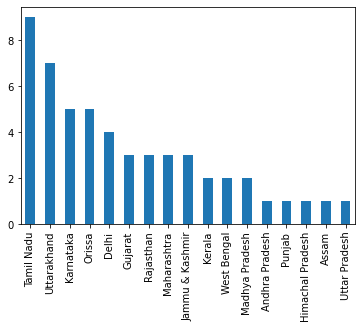

In [86]:
df['templeState'].value_counts().plot(kind='bar')


### Temples per state using 'sns.countplot'

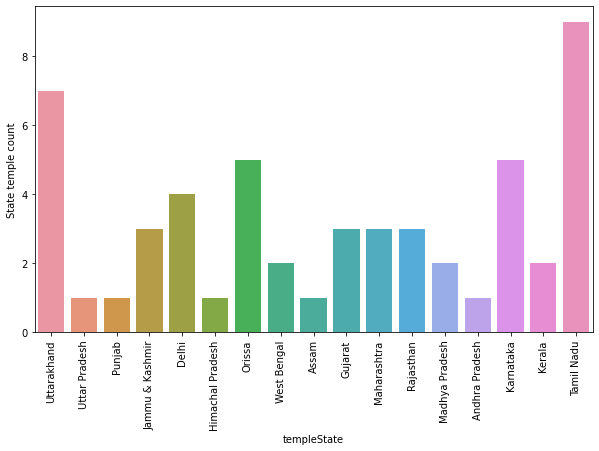

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x= 'templeState')
plt.ylabel("State temple count")
plt.xticks(rotation= 90)
plt.show()

### Temples per city using 'pandas.plot' 

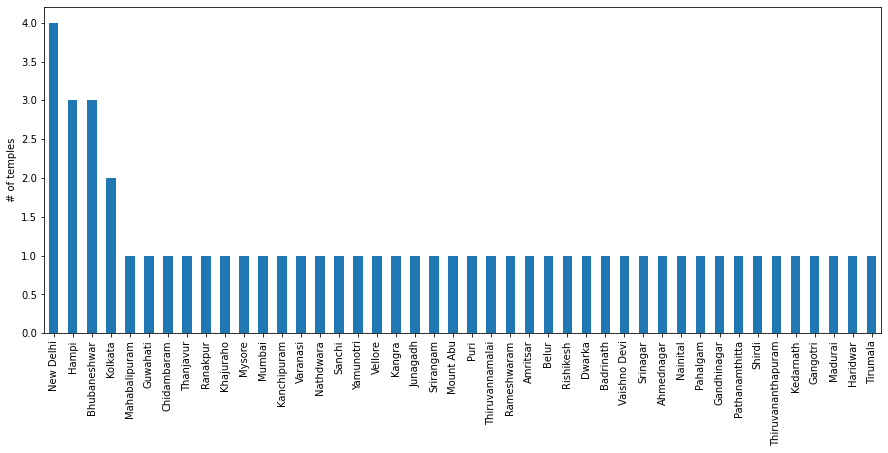

In [83]:
plt.figure(figsize=(15,6))
df['Location'].value_counts().plot(kind= 'bar')
plt.ylabel("# of temples")
plt.xticks(rotation= 90)
plt.show();

In [99]:
df.head(2)

,templeName,Description,Location,Coordinates,DistanceFromMumbai(Km),DistanceFromNewDelhi(Km),DistanceFromChennai(Km),DistanceFromKolkata(Km)
0,"Badrinath Temple | Badrinath, Uttarakhand",The Badrinath temple also known as Badrinaraya...,Badrinath,"(30.7423302, 79.4930256)",1454.013555,323.309362,1957.065909,1265.717344
1,"Kedarnath Temple | Kedarnath, Uttarakhand",Located at the highest altitude among the Char...,Kedarnath,"(30.7345609, 79.0673204)",1434.105557,295.986734,1958.477211,1294.937834


### Write a generic function which can provide distance of temples in descending(farthest) order from a city
 - Return top 10 values only

In [92]:
def dist_from_city(x):
    return df.sort_values(by= x, ignore_index=True, ascending=False).loc[:,['templeName',x]].head(10)

In [93]:
# For NewDelhi
dist_from_city("DistanceFromNewDelhi(Km)")

,templeName,DistanceFromNewDelhi(Km)
0,"Konark Sun Temple, Orissa",5987.434545
1,"Padmanabhaswamy temple | Thiruvananthapuram, K...",2224.043367
2,"Ramanathaswamy Temple | Rameshwaram, Tamil Nadu",2151.056161
3,"Sabarimala Temple | Pathanamthitta, Kerala",2140.610913
4,"Annamalaiyer Temple | Thiruvannamalai, Tamil Nadu",2111.952088
5,"Meenakshi Temple | Madurai, Tamil Nadu",2070.953907
6,"Brihadeshwara Temple | Thanjavur, Tamil Nadu",1983.899883
7,"Ranganathaswamy Temple | Srirangam, Tamil Nadu",1978.888316
8,"Thillai Nataraja Temple | Chidambaram, Tamil Nadu",1921.816741
9,"Chamundeshwari Temple | Mysore, Karnataka",1806.546481


In [100]:
#From Mumbai
dist_from_city("DistanceFromMumbai(Km)")

,templeName,DistanceFromMumbai(Km)
0,"Konark Sun Temple, Orissa",6345.522996
1,"Kamakhya Temple | Guwahati, Assam",2090.985100
2,"Shankaracharya Temple | Srinagar, Jammu & Kashmir",1672.996246
3,"Amarnath Temple | Pahalgam, Jammu & Kashmir",1672.977247
4,"Chennakesava Temple | Belur, Karnataka",1655.768411
5,"Dakshineswar Kali Temple | Kolkata, West Bengal",1655.629682
6,"Kalighat Kali Temple | Kolkata, West Bengal",1655.629682
7,"Vaishno Devi Temple | Vaishno Devi, Jammu & Ka...",1559.382643
8,"Jwalamukhi Temple | Kangra, Himachal Pradesh",1478.291352
9,"Gangotri Temple | Gangotri, Uttarakhand",1454.357504
